Importing Libraries

In [16]:
%%time

# NumPy is used for performing a wide variety of mathematical operations on arrays. 
# Here used to convert raw dataset images to 2D array.
import numpy as np

# Pandas is used for data manipulation and analysis
import pandas as pd

# Matplotlib is used for creating static, animated, and interactive visualizations. 
# Here used to plot images of dataset
import matplotlib.pyplot as plt

# Classifier used to implement the k-nearest neighbors vote. 
# OR    
# Regression based on k-nearest neighbors.
from sklearn.neighbors import KNeighborsClassifier

# Used to find Accuracy classification score and to compute confusion matrix to evaluate 
# the parameters such as accuracy, recall, precision of a classification 
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

# gzip provides a simple interface to compress and decompress files like the GNU programs gzip and gunzip. 
# Here used load the datasets for the program
import gzip

# Random implements pseudo-random number generators for various distributions.
# Here used to generate a random data matrix from the dataset
import random

# Seaborn is based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
# Here used to plot the confusion matrix 
import seaborn as sns

# Split arrays or matrices into random train and test subsets. 
# Here used to split the MNIST dataset
from sklearn.model_selection import train_test_split

# Build a text report showing the main classification metrics. 
# Here used for KNN classification.
from sklearn.metrics import classification_report

# Joblib is a set of tools to provide lightweight pipelining in Python. 
# Here used to save the classification model
import joblib

# Yellowbrick is a suite of visual analysis and diagnostic tools designed to facilitate machine learning with scikit-learn.
# Here used to plot ClassificationReport and ROCAUC
import yellowbrick

Wall time: 3 ms


Load file function

In [17]:
%%time

# The function is used to open the dataset files which contains the digit data 
def load_mnist(filename, type, n_datapoints):
    image_size = 28     # The MNIST Dataset Images have 28*28 pixels dimensions
    f = gzip.open(filename)
    
    if(type == 'image'):
        f.read(16)    # Skip Non-Image information
        buf = f.read(n_datapoints * image_size * image_size)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
        data = data.reshape(n_datapoints, image_size, image_size, 1)

    elif(type == 'label'):
        f.read(8) # Skip Inessential information
        buf = f.read(n_datapoints)
        data = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
        data = data.reshape(n_datapoints, 1)
        
    return data

Wall time: 1 ms


Importing Dataset Files


In [18]:
%%time

# Training Dataset
train_size = 60000
test_size = 10000

X = load_mnist('Train Dataset\\train-images.gz', 'image', train_size)
y = load_mnist('Train Dataset\\train-labels.gz', 'label', train_size)

X_test = load_mnist('Test Dataset\\t10k-images.gz', 'image', test_size)
y_test = load_mnist('Test Dataset\\t10k-labels.gz', 'label', test_size)

Wall time: 928 ms


To verify whether the data is loaded properly, the image and label are randomly selected and visualized

Index:  27146
Training Set: 
Label: [8]


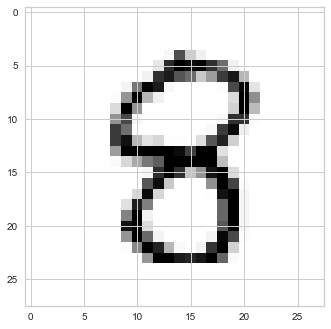

Wall time: 282 ms


In [19]:
%%time

# Selecting a random index to test 
index = random.randint(0, train_size)
print('Index: ', index)
print('Training Set: ')
print('Label:', y[index])
img = np.asarray(X[index]).squeeze()
# print(img)
plt.imshow(img)
plt.show()

Index:  3655
Training Set: 
Label: [2]


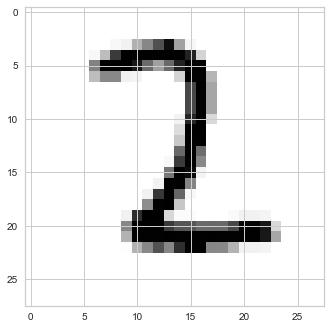

Wall time: 241 ms


In [20]:
%%time

# Selecting a random index to test 
index = random.randint(0, test_size)
print('Index: ', index)
print('Training Set: ')
print('Label:', y_test[index])
img = np.asarray(X_test[index]).squeeze()
# print(img)
plt.imshow(img)
plt.show()

# t1 = X_test[index].reshape(1, 28*28)

Index:  1000
Training Set: 
Label: [9]


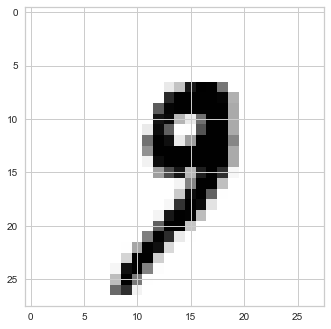

Wall time: 213 ms


In [39]:
%%time

# Selecting a random index to test 
index = random.randint(0, test_size)
print('Index: ', index)
print('Training Set: ')
print('Label:', y_test[index])
img = np.asarray(X_test[index]).squeeze()
# print(img)
plt.imshow(img)
plt.show()

Splitting the dataset into training and testing data in the ratio 75% : 25% with reduction of dataset size

In [22]:
%%time

# Splitting the dataset
X_train, X_valid, y_train, y_valid = train_test_split(X[:(train_size//10)], y[:(train_size//10)], test_size=0.25, random_state=28)
print("Shape of x-train",end='  ->  ')
print(X_train.shape)

print("Shape of x-valid",end='  ->  ')
print(X_valid.shape)

print("Shape of y-train",end='  ->  ')
print(y_train.shape)

print("Shape of y_valid",end='  ->  ')
print(y_valid.shape)

Shape of x-train  ->  (4500, 28, 28, 1)
Shape of x-valid  ->  (1500, 28, 28, 1)
Shape of y-train  ->  (4500, 1)
Shape of y_valid  ->  (1500, 1)
Wall time: 34.9 ms


Implementing KNN with n_neighbors parameter k as   1
Accuracy :  0.9506666666666667

Confusion Matrix : 



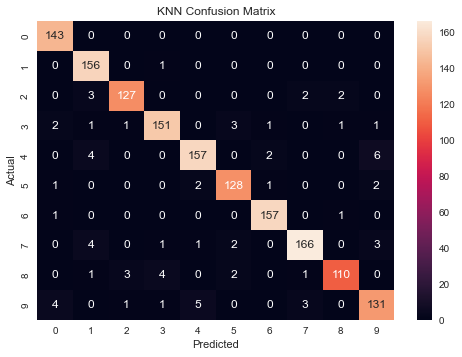



 ******************************************************************************** 


Implementing KNN with n_neighbors parameter k as   2
Accuracy :  0.9266666666666666

Confusion Matrix : 



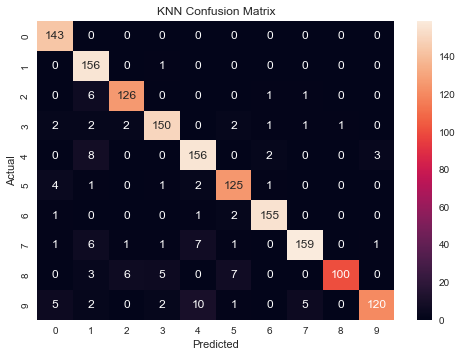



 ******************************************************************************** 


Implementing KNN with n_neighbors parameter k as   3
Accuracy :  0.938

Confusion Matrix : 



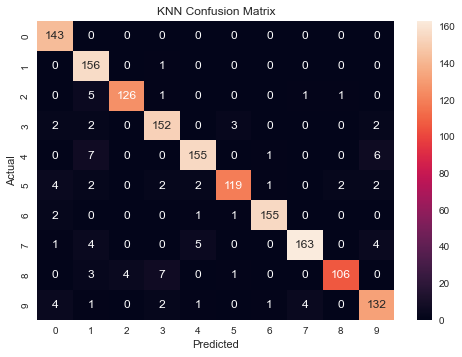



 ******************************************************************************** 


Implementing KNN with n_neighbors parameter k as   4
Accuracy :  0.9386666666666666

Confusion Matrix : 



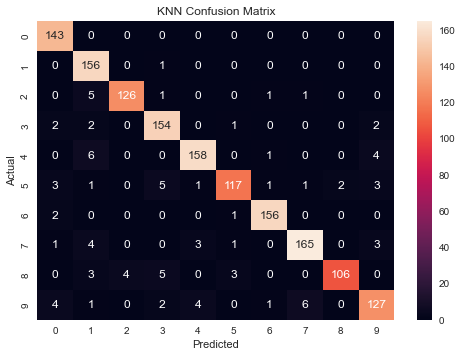



 ******************************************************************************** 


Implementing KNN with n_neighbors parameter k as   5
Accuracy :  0.9393333333333334

Confusion Matrix : 



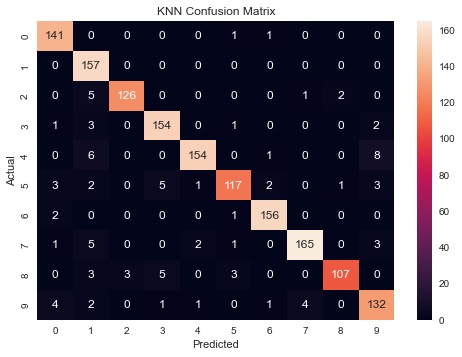



 ******************************************************************************** 


Implementing KNN with n_neighbors parameter k as   6
Accuracy :  0.94

Confusion Matrix : 



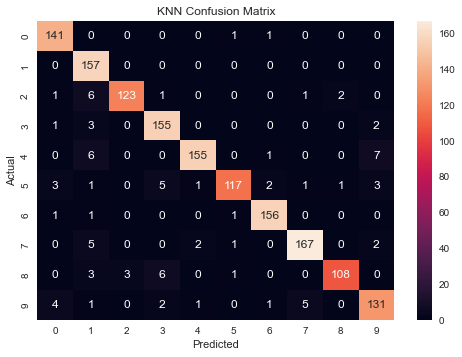



 ******************************************************************************** 


Implementing KNN with n_neighbors parameter k as   7
Accuracy :  0.9366666666666666

Confusion Matrix : 



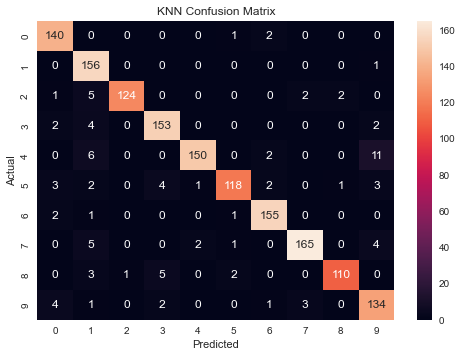



 ******************************************************************************** 


Implementing KNN with n_neighbors parameter k as   8
Accuracy :  0.936

Confusion Matrix : 



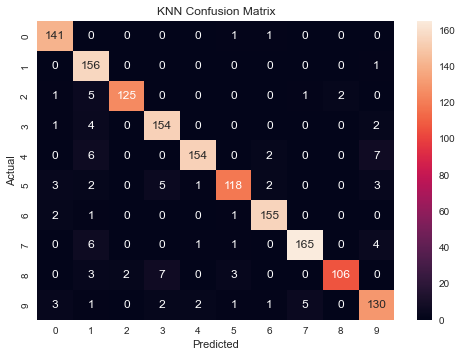



 ******************************************************************************** 


Wall time: 15.5 s


In [23]:
%%time

# List to append the accuracy scores generated and further used to plot the line chart (Graph)
score = []

# loop to change the values of n-neighbors for KNN classifier with range 1 to 8
for k in range(1, 9):
  print('Implementing KNN with n_neighbors parameter k as  ',k)

  # Implementing the KNN classifier using sklearn's KNeighborsClassifier method
  classifier = KNeighborsClassifier(n_neighbors=k)

  # Fitting the model with training values 
  classifier = classifier.fit(X_train.reshape(X_train.shape[0], 28*28), y_train.ravel())
  pred = classifier.predict(X_valid.reshape(X_valid.shape[0], 28*28))

  # Calculating the accuracy values for the predicted models
  accuracy = accuracy_score(y_valid, pred)
  print("Accuracy : ",accuracy)

  # Append the scores for line chart plotting
  score.append(accuracy)

  # To plot the confusion matrix using the HeatMap
  print("\nConfusion Matrix : \n")
  conf_matrix = confusion_matrix(y_valid,pred)
  sns.heatmap(conf_matrix,annot=True,fmt=".0f")
  plt.ylabel("Actual")
  plt.xlabel("Predicted")
  plt.title("KNN Confusion Matrix")
  plt.show()
  
  print("\n\n","*"*80,"\n\n")

Plotting the line chart for accuracy values     VS       the k(Number of Neighbors)

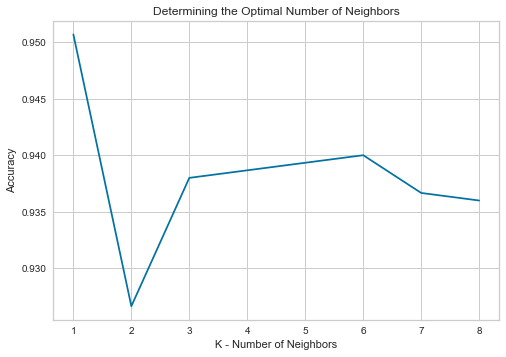

In [24]:
# Plotting the line chart
plt.plot(range(1,9), score)
plt.title('Determining the Optimal Number of Neighbors')
plt.xlabel('K - Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Looking at the performance scores, K=1 might seem the most promising model as it has the highest accuracy. 

But pragmatically, trying to predict a datapoint based on only one neighbor is definitely not a better choice to make. 

So, it's a wise choice to ignore the option. There is a huge dip in performance for K=2, and a steep increase when the neighbors are increased to 3. 

The performance curve increases for K=4, and stays same for k=5. Hence it's upto us to choose either 4 or 5 for our requirement.

In [25]:
%%time
print('Training the Model',"."*10)

# Training the model with best value of k
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski', p=2, weights='distance', algorithm='auto')

# Training the model for complete values of dataset
classifier = classifier.fit(X.reshape(X.shape[0], 28*28), y.ravel())
print("Training Complete","."*10)

Training the Model ..........
Training Complete ..........
Wall time: 90 ms


In [26]:
%%time
print('Testing the Model',"."*10)

# Testing the model for complete values of dataset
y_pred = classifier.predict(X_test.reshape(X_test.shape[0], 28*28))
print("Testing Complete","."*10)

Testing the Model ..........
Testing Complete ..........
Wall time: 1min 8s


In [27]:
%%time

# The accuracy score of best params
print("The Accuracy values is  ",accuracy_score(y_test, y_pred))

The Accuracy values is   0.9691
Wall time: 11 ms


In [28]:
%%time

# Number of features seen during fit
print("\nNumber of features seen during fit  are ",classifier.n_features_in_)

# Class labels known to the classifier
print("\nClass labels known to the classifier are ",classifier.classes_)

# The distance metric used
print("\nDistance metric used",classifier.effective_metric_, "with p value as 2")

# Additional keyword arguments for the metric function
print("\nAdditional keyword arguments are ",classifier.effective_metric_params_,"  which means there are no additional metric function.")

# Number of samples in the fitted data
print("\nNumber of samples in the fitted data are  ",classifier.n_samples_fit_)


Number of features seen during fit  are  784

Class labels known to the classifier are  [0 1 2 3 4 5 6 7 8 9]

Distance metric used euclidean with p value as 2

Additional keyword arguments are  {}   which means there are no additional metric function.
Number of samples in the fitted data are   60000
Wall time: 7 ms


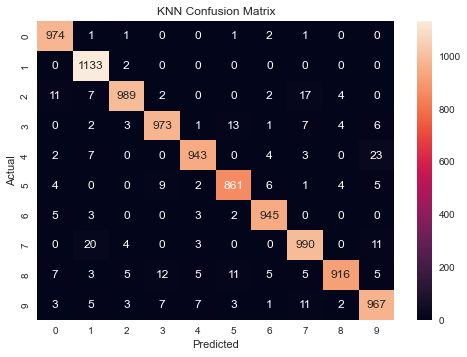

Wall time: 938 ms


In [29]:
%%time

# Plotting the heatmap of confusion matrix 
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("KNN Confusion Matrix")
plt.show()

In [30]:
%%time

# Printing the Classification Report for the result model 
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1006
           1       1.00      0.96      0.98      1181
           2       0.96      0.98      0.97      1007
           3       0.96      0.97      0.97      1003
           4       0.96      0.98      0.97       964
           5       0.97      0.97      0.97       891
           6       0.99      0.98      0.98       966
           7       0.96      0.96      0.96      1035
           8       0.94      0.98      0.96       930
           9       0.96      0.95      0.95      1017

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Wall time: 40 ms


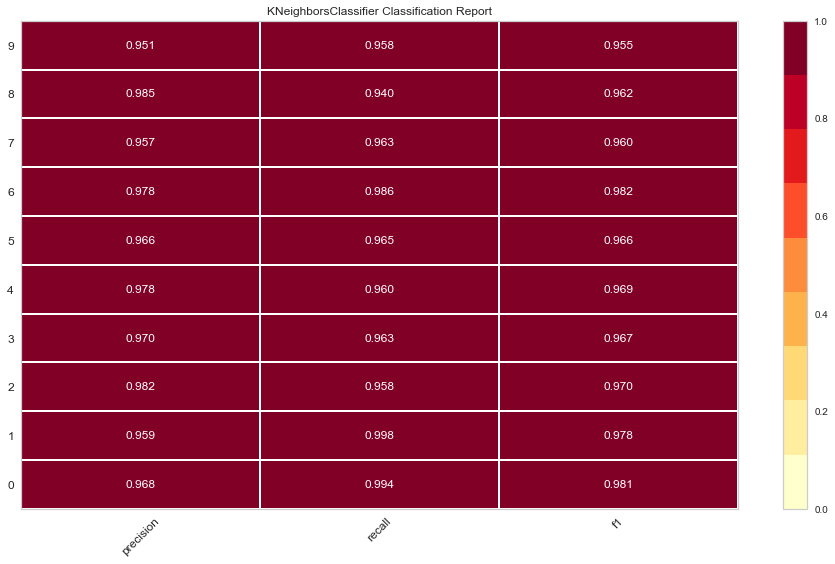

Wall time: 2min 6s


<AxesSubplot:title={'center':'KNeighborsClassifier Classification Report'}>

In [34]:
%%time

fig = plt.figure(figsize=(13,8))
ax1 = fig.add_subplot(111)

# To Display the ClassificationReport
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(KNeighborsClassifier(n_neighbors=5,metric='minkowski', p=2, weights='distance', algorithm='auto'), ax=ax1)
visualizer.fit(X.reshape(X.shape[0], 28*28), y.ravel())
visualizer.score(X_test.reshape(X_test.shape[0], 28*28), y_test)
visualizer.show()

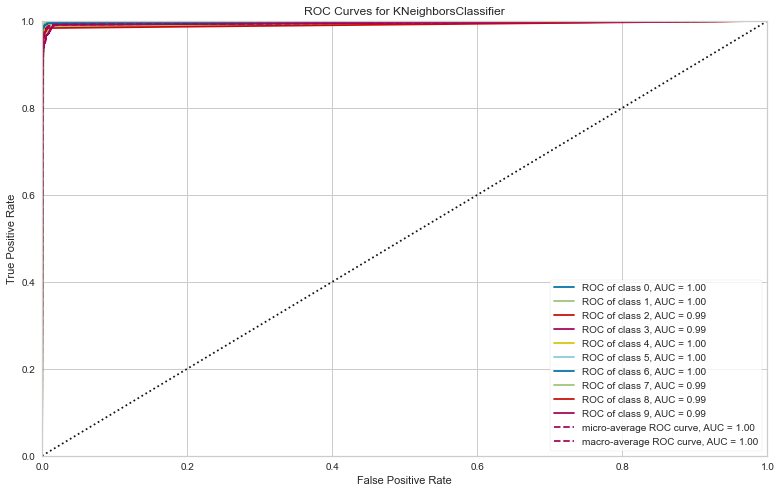

Wall time: 2min 4s


<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [32]:
%%time

# Receiver Operating Characteristic/Area Under the Curve plotting
from yellowbrick.classifier import ROCAUC
fig = plt.figure(figsize=(13,8))
ax1 = fig.add_subplot(111)

visualizer = ROCAUC(KNeighborsClassifier(n_neighbors=5,metric='minkowski', p=2, weights='distance', algorithm='auto') , ax=ax1)
visualizer.fit(X.reshape(X.shape[0], 28*28), y.ravel())
visualizer.score(X_test.reshape(X_test.shape[0], 28*28), y_test)

visualizer.show()

## Results

From the above discussions we observe that KNN Model with 5 neighbors performed really well with 96.91% accuracy and also the better precision, recall and f1-score.

Compressing the model to use for demo purposes

In [33]:
%%time

# Compressing the classifier
joblib.dump(classifier, 'knn_model.gzip', compress=('gzip',3))

Wall time: 2.88 s


['knn_model.gzip']